In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import TensorBoard

# **Workshop 5**

*   Mateo Cano Solís - 1037660293
*   Keyla García Jaimes - 1026159841

### Conjunto de datos - [CamVid (Cambridge-driving Labeled Video Database)](https://paperswithcode.com/dataset/camvid)

es una base de datos de comprensión de escenas de conducción/carretera que se capturó originalmente como cinco secuencias de video con una cámara montada en el tablero de un automóvil. Esas secuencias fueron muestreadas (cuatro de ellas a 1 fps y una a 15 fps) sumando 701 cuadros. Esos fotogramas se anotaron manualmente con 32 clases: vacío, edificio, pared, árbol, vegetación, valla, acera, bloque de estacionamiento, columna/poste, cono de tráfico, puente, letrero, texto misceláneo, semáforo, cielo, túnel, arco, carretera , arcén, marcas de carril (conducir), marcas de carril (sin conducir), animal, peatón, niño, carro de equipaje, ciclista, motocicleta, automóvil, SUV/pickup/camión, camión/autobús, tren y otros objetos en movimiento.

<img src='https://production-media.paperswithcode.com/datasets/Screen_Shot_2021-01-28_at_9.59.33_PM.png' />


In [ ]:
!gdown https://drive.google.com/uc?id=1gt0nCGft0winZqHBYaTb1EL6zM8lrKPA
!unzip -o camvid.zip

In [ ]:
!wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

In [ ]:
pip install keras-segmentation

### Inicializar U-Net

In [ ]:
from keras_segmentation.models.unet import unet
model = unet(n_classes=50 ,  input_height=320, input_width=640)

Entrenar el modelo

In [ ]:
model.train(
    train_images =  "dataset/train/images",
    train_annotations = "dataset/train/labels",
    checkpoints_path = "/tmp/unet_1" , epochs=20  
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 141.39it/s]
/usr/local/lib/python3.7/dist-packages/keras_segmentation/train.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epochs=epochs, callbacks=callbacks)


Dataset verified! 
Epoch 1/20
  6/512 [..............................] - ETA: 53s - loss: 4.2453 - accuracy: 0.0387

512/512 [==============================] - 72s 112ms/step - loss: 2.4251 - accuracy: 0.5146
Epoch 2/20
512/512 [==============================] - 58s 113ms/step - loss: 1.5783 - accuracy: 0.6801
Epoch 3/20
512/512 [==============================] - 58s 113ms/step - loss: 1.3231 - accuracy: 0.7188
Epoch 4/20
512/512 [==============================] - 58s 114ms/step - loss: 1.1712 - accuracy: 0.7408
Epoch 5/20
512/512 [==============================] - 57s 112ms/step - loss: 1.0770 - accuracy: 0.7538
Epoch 6/20
512/512 [==============================] - 58s 114ms/step - loss: 1.0065 - accuracy: 0.7643
Epoch 7/20
512/512 [==============================] - 58s 113ms/step - loss: 0.9550 - accuracy: 0.7724
Epoch 8/20
512/512 [==============================] - 58s 114ms/step - loss: 0.9190 - accuracy: 0.7776
Epoch 9/20
512/512 [==============================] - 58s 114ms/step - loss: 0.8787 - accuracy: 0.7844
Epoch 10/20
512/512 [==============================] - 58s 112ms/step - loss: 0.8435

Predicciones

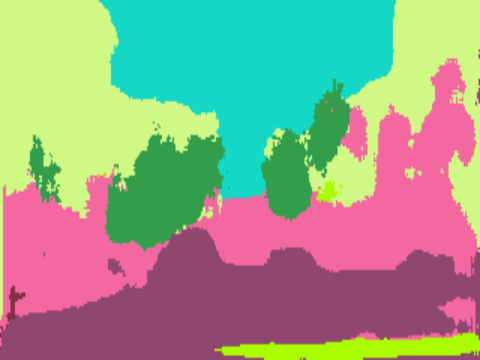

In [ ]:
out = model.predict_segmentation(
    inp="dataset/test/images/0001TP_008550.png",
    out_fname="out.png"
)
#plt.imshow(out)
from IPython.display import Image
Image('out.png')

1. Desarrolle un modelo para Segmentar el conjunto de datos LandCoverData utilizando la arquitectura U-Net.

# **LandCover DataSet**

In [ ]:
!pip install -U segmentation-models
!pip install keras.utils 
!pip install keras-segmentation

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import os
import numpy
from sklearn.model_selection import train_test_split
import random
import cv2
import io
#import segmentation_models as sm
import PIL
from tensorflow.keras.utils import to_categorical
import os

from keras_segmentation.models.unet import unet

In [3]:
#Importar la data 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/deep_learning/"
base_dir = root_dir + 'LandCoverData/'
print("base_dir is: ", base_dir)

Mounted at /content/drive
base_dir is:  /content/drive/My Drive/deep_learning/LandCoverData/


In [ ]:
image_dir= os.path.join(base_dir, 'images/Imagenes')
mask_dir=os.path.join(base_dir, 'labels/')

In [ ]:
dataset_image= os.listdir(image_dir)
dataset_mask=os.listdir(mask_dir)

In [ ]:
image_directory= os.path.join(base_dir, 'images/')
val_directory= os.path.join(mask_dir, 'images/')

In [ ]:
image_directory

'/content/drive/My Drive/deep_learning/LandCoverData/images/'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/My Drive/deep_learning/LandCoverData/images/",
  validation_split=0,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10674 files belonging to 1 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/My Drive/deep_learning/LandCoverData/labels_1/",
  validation_split=0,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10674 files belonging to 1 classes.


In [4]:
model = unet(n_classes=4, input_height=512, input_width=512)

In [5]:
model.train(
    train_images =  '/content/drive/My Drive/deep_learning/LandCoverData/images/Imagenes',
    train_annotations = "/content/drive/My Drive/deep_learning/LandCoverData/labels_1/labels",
    checkpoints_path = "/content/drive/My Drive/deep_learning/LandCoverData/models/unet_1" , epochs=10  
)

Verifying training dataset


100%|██████████| 10674/10674 [1:18:17<00:00,  2.27it/s]
/usr/local/lib/python3.7/dist-packages/keras_segmentation/train.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epochs=epochs, callbacks=callbacks)


Dataset verified! 
Epoch 1/10
  6/512 [..............................] - ETA: 1:03 - loss: 1.8679 - accuracy: 0.2264

512/512 [==============================] - 78s 140ms/step - loss: 1.4753 - accuracy: 0.4533
Epoch 2/10
512/512 [==============================] - 66s 129ms/step - loss: 1.3038 - accuracy: 0.5450
Epoch 3/10
512/512 [==============================] - 66s 129ms/step - loss: 1.2858 - accuracy: 0.5543
Epoch 4/10
512/512 [==============================] - 66s 129ms/step - loss: 1.2332 - accuracy: 0.5721
Epoch 5/10
512/512 [==============================] - 66s 129ms/step - loss: 1.2182 - accuracy: 0.5914
Epoch 6/10
512/512 [==============================] - 66s 130ms/step - loss: 1.1936 - accuracy: 0.6014
Epoch 7/10
512/512 [==============================] - 66s 129ms/step - loss: 1.1794 - accuracy: 0.6087
Epoch 8/10
512/512 [==============================] - 66s 129ms/step - loss: 1.1840 - accuracy: 0.6153
Epoch 9/10
512/512 [==============================] - 66s 129ms/step - loss: 1.1673 - accuracy: 0.6171
Epoch 10/10
512/512 [==============================] - 66s 129ms/step - loss: 1.1409

**Predicciones**

Se crea una función que permite imprimir la imagen, la mascara y la predicción, si se corre el modelo con más epocas de seguro se tendria una precisión mucho más adecuada, debido a que para pocas epocas se ve un avance positivo en el acuraccy y una disminución constante del loss.

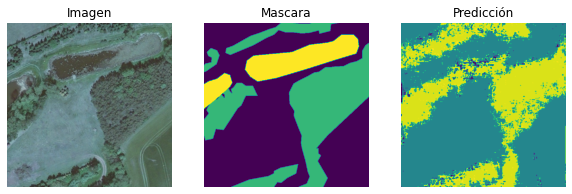

In [13]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

def graficar(imm):
  im="/content/drive/My Drive/deep_learning/LandCoverData/images/Imagenes/"+imm+".jpg"
  lb="/content/drive/My Drive/deep_learning/LandCoverData/labels_1/labels/"+imm+".png"
  out = model.predict_segmentation(
    inp=im,
    out_fname="out.png"
  )
  # create figure
  fig = plt.figure(figsize=(10, 7))  
  # setting values to rows and column variables
  rows = 1
  columns = 3
  # reading images
  Image1 = cv2.imread(im)
  Image2 = cv2.imread(lb)
  Image3 = cv2.imread('out.png')

  fig.add_subplot(rows, columns, 1)
  plt.imshow(Image1)
  plt.axis('off')
  plt.title("Imagen")

  fig.add_subplot(rows, columns, 2)
  Image2 = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)
  Image2 = np.asarray(Image2)*85
  plt.imshow(Image2)
  plt.axis('off')
  #plt.colorbar()
  plt.title("Mascara")

  fig.add_subplot(rows, columns, 3)
  Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2GRAY)
  plt.imshow(Image3)
  plt.axis('off')
  plt.title("Predicción")
  #plt.colorbar()
  #fig.colorbar(h)

imm="N-33-130-A-d-4-4_163"
graficar(imm)

2. ¿Cuál es la diferencia en tamaño, número de imágenes, formato, profundidad o número de canales o bandas (binario, gris o color) y tipo (8 bits sin firmar, 32 bits, etc.), cuántas clases hay para camvid y para el conjunto de datos LandCover? ¿Cuál consideras mejor? ¿por qué?.

Las diferencias encontradas entre los dos DataSets estan dadas por:

**Tamaño de imagenes**:
 * Dataset de Camvid: 480*360 pixeles
 * Dataset de Landcover: 512*512 pixeles

**Numero de imagenes**:
 * Dataset de Camvid: 701 imagenes
 * Dataset de Landcover: 10.674 imagenes

**Formato**:
 * Camvid: formato PNG
 * Landcover: formato JPG

**Numero de canales**:
 * Camvid: RGB
 * Landcover: RGB

**Tipo**:
 * Camvid: 24 bits
 * Landcover: 24 bits

**Clases**:
 * Camvid: 32 clases
 * Landcover: 4 clases

Con base en lo anterior, se puede concluir que el dataset de CamVid, es mejor a la hora de realizar una segmentación semántica, ya que este cuenta con imagenes y etiquetas con una mejor resolución, por lo que permitira hacer mejor la segmentación y eventualmente se obtendrán mejor accuracy en el modelo.

Fuente: https://paperswithcode.com/dataset/landcover-ai, https://openaccess.thecvf.com/content/CVPR2021W/EarthVision/papers/Boguszewski_LandCover.ai_Dataset_for_Automatic_Mapping_of_Buildings_Woodlands_Water_and_CVPRW_2021_paper.pdf

3. Descarga 10 imágenes de google earth de 200x200 píxeles y reporta los resultados al realizar inferencia sobre el modelo obtenido.

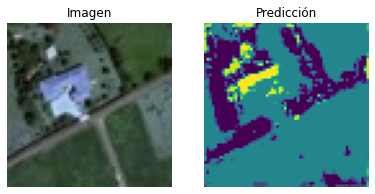

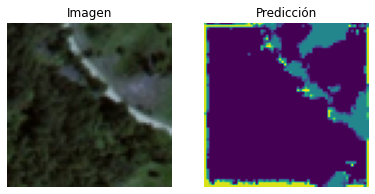

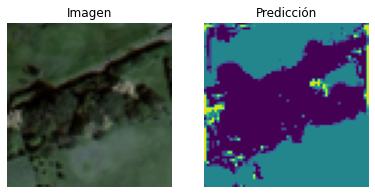

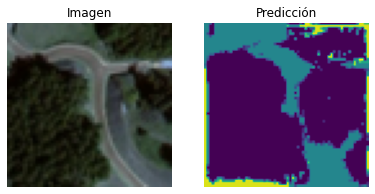

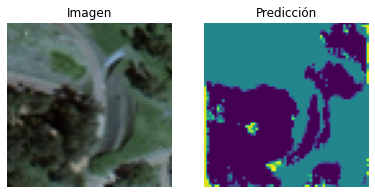

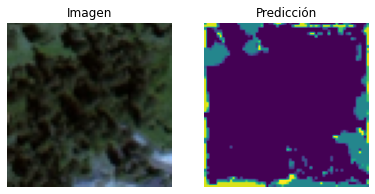

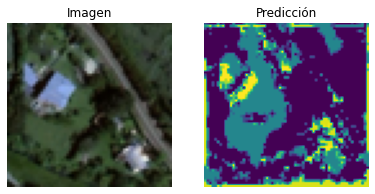

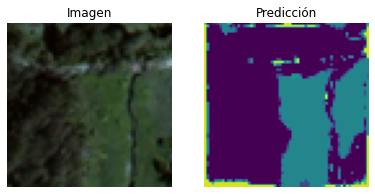

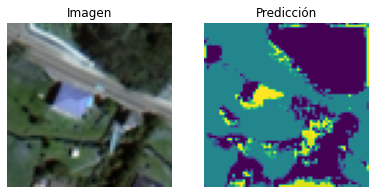

In [25]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

def graficar(imm):
  im="/content/drive/My Drive/deep_learning/LandCoverData/test/"+imm+".jpg"
  out = model.predict_segmentation(
    inp=im,
    out_fname="out.png"
  )
  # create figure
  fig = plt.figure(figsize=(10, 7))  
  # setting values to rows and column variables
  rows = 1
  columns = 3
  # reading images
  Image1 = cv2.imread(im)
  Image3 = cv2.imread('out.png')

  fig.add_subplot(rows, columns, 1)
  plt.imshow(Image1)
  plt.axis('off')
  plt.title("Imagen")

  fig.add_subplot(rows, columns, 2)
  Image3 = cv2.cvtColor(Image3, cv2.COLOR_BGR2GRAY)
  plt.imshow(Image3)
  plt.axis('off')
  plt.title("Predicción")
  #plt.colorbar()
  #fig.colorbar(h)

#imm="Imagen2"
#graficar(imm)

for i in range(1,10):
  imm="Imagen{}".format(i)
  graficar(imm)